In [1]:
from project_lib.genotype_simulation import *
from project_lib.stat_functions import *

C:\Users\Philip\miniconda3\envs\Masterarbeit\Lib\site-packages\stdpopsim\catalog\HomSap\demographic_models.py:158: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time=int(extended_GF.time.head(1) - 1), rate=0
C:\Users\Philip\miniconda3\envs\Masterarbeit\Lib\site-packages\stdpopsim\catalog\HomSap\demographic_models.py:161: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time=int(extended_GF.time.tail(1) + 1), rate=0


In [2]:
#read genetic map
genmap = pd.read_csv("data/sim_data/B73_genmap.csv")
#read parent genotypes
parent_genos = pd.read_csv("data/sim_data/NAM_parent_genos.csv")
#read reference allele
ref_allele = pd.read_csv("data/sim_data/B73_alleles.csv")

In [3]:
#pedigree to simulate (for illustration: 5 instead of 194 offspring)
cross_selfing_pedigree = cross_selfing_ped(offspring = 5, selfing_genos = 5)
#turn pedigree into tskit treesquence with sequence length 100 (real: ~2 Gigabases per chromosomes)
cs_ped_ts = df_to_ts(cross_selfing_pedigree, seq_len = 100)

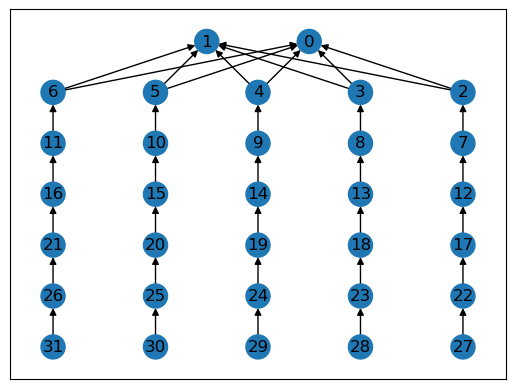

In [4]:
#pedigree
draw_pedigree(cs_ped_ts.tree_sequence())

In [5]:
#simulate ancestry in fixed pedigree for ancestral recombination graph (ARG)
cs_ped_arg = msprime.sim_ancestry(initial_state = cs_ped_ts, model = "fixed_pedigree", 
                                  random_seed = 42, recombination_rate = 0.001)

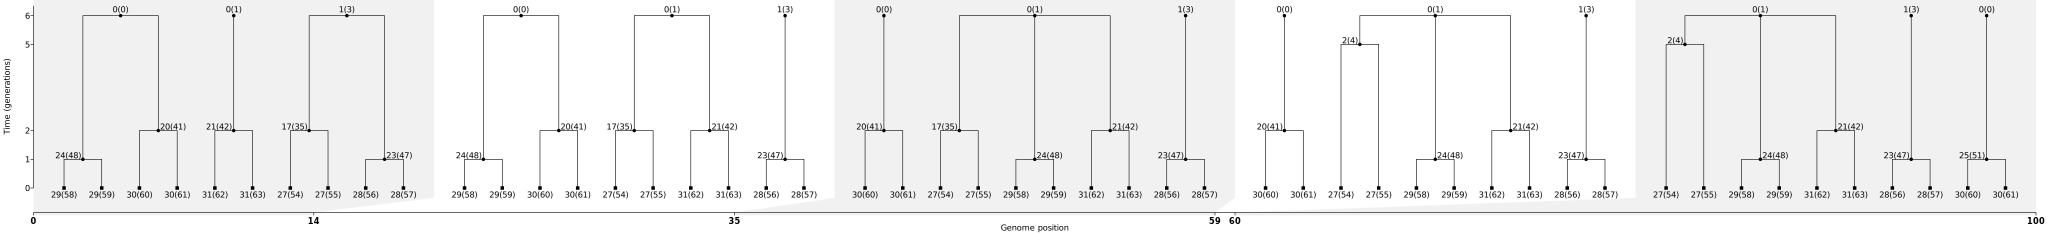

In [6]:
#draw ARG
draw_ancestry(cs_ped_arg)

In [7]:
#print ARG in tskit table form -> Nodes and edges draw ARG, i.e. where simulated recombination events occured in pedigree
print(cs_ped_arg.dump_tables())

TableCollection

Sequence Length: 100.0
Time units: generations
Metadata: b''

Individuals
╔══╤═════╤════════╤═══════╤═════════════════╗
║id│flags│location│parents│metadata         ║
╠══╪═════╪════════╪═══════╪═════════════════╣
║0 │    0│        │ -1, -1│ {'file_id': '0'}║
║1 │    0│        │ -1, -1│ {'file_id': '1'}║
║2 │    0│        │   0, 1│ {'file_id': '2'}║
║3 │    0│        │   0, 1│ {'file_id': '3'}║
║4 │    0│        │   0, 1│ {'file_id': '4'}║
║5 │    0│        │   0, 1│ {'file_id': '5'}║
║6 │    0│        │   0, 1│ {'file_id': '6'}║
║7 │    0│        │   2, 2│ {'file_id': '7'}║
║8 │    0│        │   3, 3│ {'file_id': '8'}║
║9 │    0│        │   4, 4│ {'file_id': '9'}║
║10│    0│        │   5, 5│{'file_id': '10'}║
║11│    0│        │   6, 6│{'file_id': '11'}║
║12│    0│        │   7, 7│{'file_id': '12'}║
║13│    0│        │   8, 8│{'file_id': '13'}║
║14│    0│        │   9, 9│{'file_id': '14'}║
║15│    0│        │ 10, 10│{'file_id': '15'}║
║16│    0│        │ 11, 11│{'file_i

In [8]:
#simulate whole offspring genotypes of cross + 5 selfing genos pedigree with founders B73 and CML103
whole_sim = genotype_simulation(genetic_map = genmap, parent_genos = parent_genos, ref_allele = ref_allele, 
                                founder_list = list(["B73", "B97"]), offspring = 200, selfing_genos = 5)

starting simulation
finished chromsome 1
finished chromsome 2
finished chromsome 3
finished chromsome 4
finished chromsome 5
finished chromsome 6
finished chromsome 7
finished chromsome 8
finished chromsome 9
finished chromsome 10


In [9]:
whole_sim

individual PZA01271.1 PZA03613.1 PZA02129.1 PZA02032.1 PHM2244.142  \
0           972         CC         AA         TT         TT          CC   
1           973         GG         TT         CC         AA          GG   
2           974         CC         AA         TT         TT          CC   
3           975         CC         AA         TT         TT          CC   
4           976         CC         AA         TT         TT          CC   
..          ...        ...        ...        ...        ...         ...   
189        1161         GG         TT         CC         AA          GG   
190        1162         CC         AA         TT         TT          CC   
191        1163         GG         TT         CC         AA          GG   
192        1164         GC         TA         CT         AT          GC   
193        1165         GG         TT         TT         TT          CC   

    PZA02372.1 PHM6238.36 PZA00181.2 PZA00528.1  ... PZA03604.1 PZA00130.9  \
0           TT         AA         GG         AA  ...         CC         CC   
1           TT         AA         TT         CC  ...         TT         CC   
2           TT         AA         GG         AA  ...         TC         CC   
3           TT         AA         GG         AA  ...         CC         CC   
4           TT         AA         GG         AA  ...         CT         CC   
..         ...        ...        ...        ...  ...        ...        ...   
189         TT         AA         TT         CC  ...         TT         CC   
190         TT         AA         GG         AA  ...         CC         CC   
191         TT         AA         TT         CC  ...         TT         CC   
192         TT         AA         TG         CA  ...         TT         CC   
193         TT         AA         GG         AA  ...         CC         CC   

    PZA02969.9 PZA02049.1 PZA00007.1 PHM5435.25 PZA01073.1 PZA01001.2  \
0           CC         GG         CC         AA         AA         TT   
1           CC         GG         CC         AA         AA         TT   
2           CT         GC         CA         AG         AG         TC   
3           TT         CC         AA         GG         GG         CC   
4           TT         CC         AA         GG         GG         CC   
..         ...        ...        ...        ...        ...        ...   
189         CC         GG         CC         AA         AA         TT   
190         TT         CC         AA         GG         GG         CC   
191         CC         GG         CC         AA         AA         TT   
192         CC         GG         CC         AA         AA         TT   
193         TT         CC         AA         GG         GG         CC   

    PZA02578.1 PZA00062.4  
0           CC         CC  
1           CC         CC  
2           CT         CC  
3           TT         TT  
4           TT         TT  
..         ...        ...  
189         CC         CC  
190         TT         TT  
191         CC         CC  
192         CC         CC  
193         TT         TT  

[194 rows x 975 columns]

In [10]:
add_sim = additive_encoding(ref_allele, whole_sim)

In [11]:
add_sim

SNP         PHM10225.15  PHM10321.11  PHM10404.8  PHM11114.7  PHM11226.13  \
individual                                                                  
972                   1           -1          -1          -1           -1   
973                  -1            1          -1          -1           -1   
974                   1           -1          -1          -1           -1   
975                  -1           -1          -1          -1           -1   
976                  -1           -1          -1          -1           -1   
...                 ...          ...         ...         ...          ...   
1161                 -1            1          -1          -1           -1   
1162                 -1           -1          -1          -1           -1   
1163                 -1           -1          -1          -1           -1   
1164                 -1           -1          -1          -1           -1   
1165                 -1            1           1          -1           -1   

SNP         PHM11985.27  PHM1218.6  PHM12706.14  PHM12749.13  PHM1275.22  ...  \
individual                                                                ...   
972                  -1         -1           -1           -1           1  ...   
973                  -1         -1            1           -1           0  ...   
974                  -1         -1           -1           -1          -1  ...   
975                  -1         -1           -1            1           1  ...   
976                  -1         -1            1            1          -1  ...   
...                 ...        ...          ...          ...         ...  ...   
1161                 -1         -1            1           -1           1  ...   
1162                 -1         -1            1           -1           1  ...   
1163                 -1         -1           -1           -1           1  ...   
1164                 -1         -1            1            1           1  ...   
1165                 -1         -1           -1            1          -1  ...   

SNP         kip1.3  lac1.3  sh2.21  umc128.2  umc13.1  vdac1a.1  wx1.1  \
individual                                                               
972              1       1       1        -1       -1        -1      1   
973              1      -1       1        -1        1        -1     -1   
974             -1      -1       1        -1        1        -1      1   
975             -1      -1       1        -1        1        -1      1   
976              1      -1       1        -1        1        -1      1   
...            ...     ...     ...       ...      ...       ...    ...   
1161             1       1       1        -1        0         1      1   
1162            -1      -1       0        -1        1         1      1   
1163            -1      -1      -1        -1        1        -1      1   
1164             1       1      -1        -1        1        -1      1   
1165            -1       1      -1        -1       -1        -1     -1   

SNP         zb21.1  zb27.1  zfl2.9  
individual                          
972              1      -1      -1  
973             -1       1      -1  
974              1       1      -1  
975              1       1       1  
976              1       1       1  
...            ...     ...     ...  
1161            -1      -1      -1  
1162             1       0      -1  
1163             1      -1      -1  
1164            -1       1      -1  
1165             1      -1       1  

[194 rows x 974 columns]

In [12]:
#read in real population 1 genotype, add individual numbering and turn into additive encoding using reference allele
pop_1_genos = pd.read_csv("data/NAM_genotype_data/pop_01_genos.csv")
pop_1_genos = pop_1_genos[pop_1_genos.columns.intersection(genmap["Marker"])]
pop_1_genos["individual"] = [i for i in range(194)]
add_1 = additive_encoding(ref_allele, pop_1_genos)

In [13]:
pop_1_genos

an1.5 lac1.3 PHM10225.15 PHM10321.11 PHM10404.8 PHM11114.7 PHM11226.13  \
0      AA     TT          GG          CC         GG         TT          GG   
1      AA     TT          CC          CC         GG         TT          GG   
2      AA     TT          GG          GG         CC         TT          GG   
3      GG     TT          CC          GG         CC         TT          GG   
4      GG     CC          GG          CC         GG         TT          GG   
..    ...    ...         ...         ...        ...        ...         ...   
189    GG     CC          CC          CC         GG         TT          GG   
190    GG     CC          --          CC         GG         TT          GG   
191    AA     CC          GG          GC         GC         TT          GG   
192    AA     TT          GG          --         CC         TT          GG   
193    AA     TT          CC          CC         GG         TT          GG   

    PHM1218.6 PHM12706.14 PHM12749.13  ... PZB00605.1 PZB01021.1 PZB01062.3  \
0          GG          TT          CC  ...         GG         TT         TT   
1          GG          TT          CC  ...         AA         TT         TT   
2          GG          TT          GG  ...         GG         CC         TT   
3          GG          TT          GG  ...         AA         TT         TT   
4          GG          CC          CC  ...         GG         TT         TT   
..        ...         ...         ...  ...        ...        ...        ...   
189        GG          CC          GG  ...         GG         --         TT   
190        GG          CC          CC  ...         GG         CC         TT   
191        GG          TT          GG  ...         GG         TT         TT   
192        GG          --          GG  ...         GG         TT         TT   
193        GG          CC          GG  ...         AA         TT         TT   

    PZB01227.6 PZB01233.1 PZB02058.1 PZD00033.3 umc13.1 vdac1a.1 individual  
0           AA         AA         TT         GG      GG       GG          0  
1           AA         AC         TT         GG      GG       GG          1  
2           AA         AA         TT         GG      GG       CC          2  
3           AA         CC         TT         TT      AA       CC          3  
4           AA         AA         TT         GG      AA       GG          4  
..         ...        ...        ...        ...     ...      ...        ...  
189         AA         CC         TT         TT      AA       GG        189  
190         AA         AA         TT         GG      AA       GG        190  
191         AA         CC         TT         GG      GG       CC        191  
192         AA         AA         TT         GG      GG       GG        192  
193         AA         AA         TT         TT      GG       CC        193  

[194 rows x 975 columns]

In [14]:
add_1

SNP         PHM10225.15  PHM10321.11  PHM10404.8  PHM11114.7  PHM11226.13  \
individual                                                                  
0                    -1            1           1          -1           -1   
1                     1            1           1          -1           -1   
2                    -1           -1          -1          -1           -1   
3                     1           -1          -1          -1           -1   
4                    -1            1           1          -1           -1   
...                 ...          ...         ...         ...          ...   
189                   1            1           1          -1           -1   
190                   1            1           1          -1           -1   
191                  -1            0           0          -1           -1   
192                  -1            1          -1          -1           -1   
193                   1            1           1          -1           -1   

SNP         PHM11985.27  PHM1218.6  PHM12706.14  PHM12749.13  PHM1275.22  ...  \
individual                                                                ...   
0                    -1         -1           -1            1          -1  ...   
1                    -1         -1           -1            1           1  ...   
2                    -1         -1           -1           -1           1  ...   
3                    -1         -1           -1           -1           1  ...   
4                    -1         -1            1            1           1  ...   
...                 ...        ...          ...          ...         ...  ...   
189                  -1         -1            1           -1          -1  ...   
190                  -1         -1            1            1          -1  ...   
191                  -1         -1           -1           -1           1  ...   
192                  -1         -1            1           -1          -1  ...   
193                  -1         -1            1           -1          -1  ...   

SNP         kip1.3  lac1.3  sh2.21  umc128.2  umc13.1  vdac1a.1  wx1.1  \
individual                                                               
0               -1       1      -1        -1       -1         1     -1   
1               -1       1      -1        -1       -1         1     -1   
2               -1       1       1        -1       -1        -1      1   
3                1       1      -1        -1        1        -1     -1   
4               -1      -1      -1        -1        1         1     -1   
...            ...     ...     ...       ...      ...       ...    ...   
189              1      -1       1        -1        1         1      1   
190             -1      -1       1        -1        1         1      1   
191             -1      -1      -1        -1       -1        -1      1   
192             -1       1       1        -1       -1         1      1   
193             -1       1       1        -1       -1        -1      1   

SNP         zb21.1  zb27.1  zfl2.9  
individual                          
0               -1      -1       1  
1                1       1       1  
2               -1       1      -1  
3               -1      -1       1  
4               -1       1       1  
...            ...     ...     ...  
189             -1       1       1  
190              1      -1      -1  
191             -1      -1      -1  
192              1       1       1  
193             -1      -1      -1  

[194 rows x 974 columns]

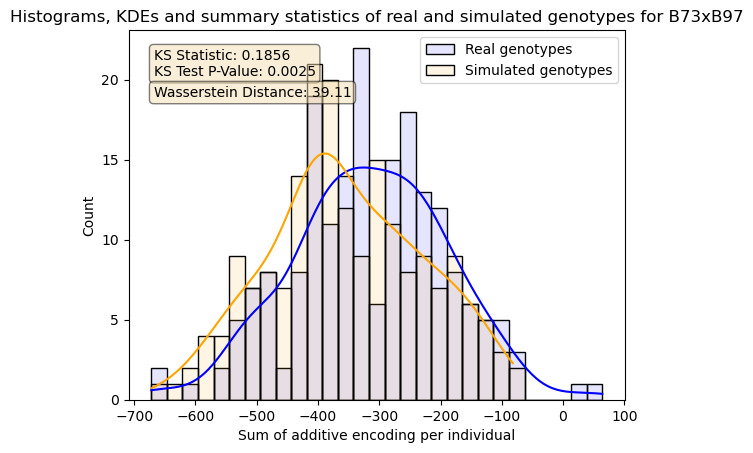

In [19]:
#create summary plot of real and simulated population 1
summary_plot(real_additive = add_1, sim_additive = add_sim, founder_list = list(["B73", "B97"]), out_path = "plots/summary_B97_x_B73.png")